In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Advertising.csv")

In [5]:
data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [7]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
data.shape

(200, 4)

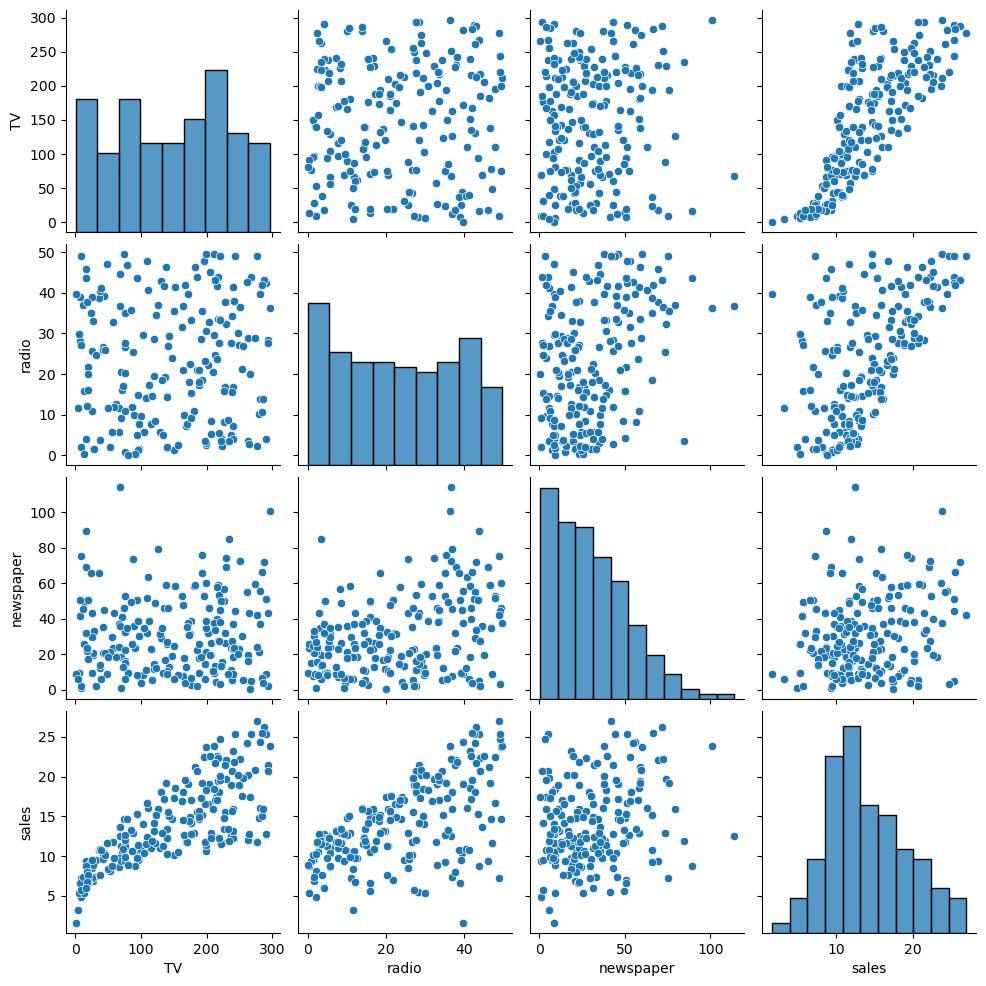

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(data=data)
plt.show()

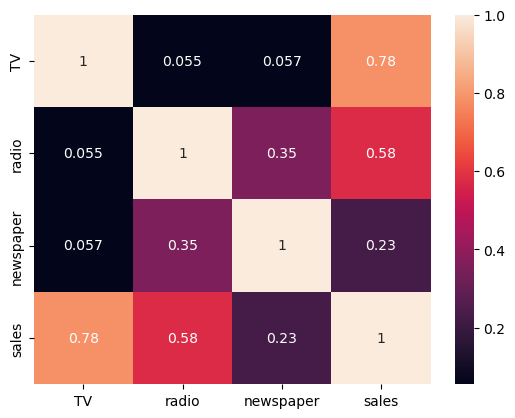

In [12]:
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [13]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [14]:
X=data.iloc[:,:-1]
Y= data["sales"]

In [15]:
X.ndim

2

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
pf=PolynomialFeatures(degree=3)
pf.fit(X)
x=pf.transform(X)

In [18]:
x

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
#Feature scalling
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [42]:
lr.score(X_test,Y_test)

0.899438024100912

In [62]:
pred=lr.predict(X_test)

In [64]:
lr.coef_                   #M value

array([3.76419618, 2.79230665, 0.05597551])

In [66]:
lr.intercept_         #C value

14.100000000000001

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
import numpy as np
np.sqrt(mean_squared_error(Y_test,pred))

1.78159966153345

In [76]:
mean_absolute_error(Y_test,pred)

1.46075671681176

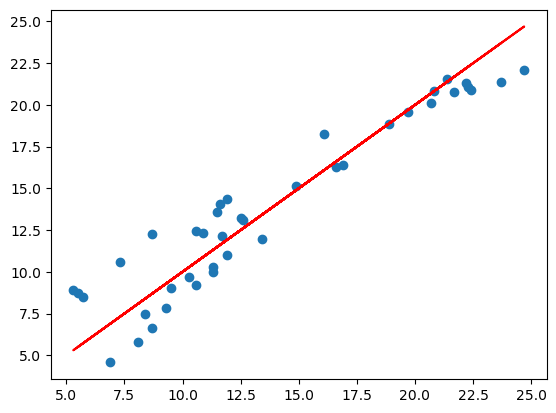

In [78]:
# Our predictions from the model
plt.scatter(Y_test,pred)

# Perfect predictions
plt.plot(Y_test,Y_test,'r')